<h1 style="text-align: center;">Bayesian Methods in A/B Testing</h1>
<h1 style="text-align: center;">DSCO23, Data Institute, University of San Francisco</h1>

$\;$

<table><tr>
<td> <img src="di_logo.png" alt="DI_Logo" style="height: 300px;"/> </td>
<td> <img src="101_howard.jpeg" alt="UW_Logo" style="height: 300px;"/> </td>
</tr></table>

$\;$

## Overview and Learning Objectives

A/B testing has become a ubiquitous method for testing and evaluating product changes in the tech industry. Companies with a culture of experimentation and a “test everything” philosophy commonly run hundreds of experiments per day, engaging millions of users. The statistical framework for A/B testing is consistent with randomized controlled trials: users are randomly assigned to different variants (of a product, ad, promotion, etc.), data is collected on each user, and these observations are used to compare among the variants. Such comparisons are commonly carried out using traditional frequentist methods like hypothesis tests and p-values. However, the comparisons of interest and the available data both lend themselves naturally to Bayesian methods of statistical inference. Accordingly, the use of Bayesian methods in A/B testing is a growing trend, and the focus of this short course. The learning outcomes for the course are the following. Participants can expect to become familiar with 

* the shortcomings of traditional frequentist methods (e.g., misuse and misunderstanding of p-values);
* the basics of Bayesian inference (e.g., Bayes rule, prior distributions, posterior distributions); and
* the manner in which Bayesian methods are being used in industry for A/B testing. In particular, how tools like Bayes factors, posterior probabilities, and credible intervals, may be used to inform both the design and analysis of these experiments.

$\;$

## About Your Instructor

[Nathaniel Stevens](https://uwaterloo.ca/scholar/nstevens) is an Assistant Professor of Statistics at the University of Waterloo (UW) in the Department of Statistics and Actuarial Science, and he is the Director of the BMATH and BCS in Data Science programs. Prior to this, Nathaniel held a faculty position at the University of San Francisco (USF) where he was jointly appointed in the Department of Mathematics and Statistics as well as the MS in Data Science program. In this time he served as Program Director for their BS in Data Science program and offered consulting and training through the Data Institute. Before that, Nathaniel earned BMATH, MMATH, and PhD degrees in Statistics from the University of Waterloo. 

<table><tr>
<td> <img src="uw_crest.png" alt="DI_Logo" style="height: 300px;"/> </td>
<td> <img src="uw_campus.jpeg" alt="UW_Logo" style="height: 300px;"/> </td>
</tr></table>

Having overseen 30+ data science internships at 20+ companies, Nathaniel is interested in using statistics to solve practical problems, and he has a passion for inspiring and training students to do the same. His research interests lie at the intersection of data science and industrial statistics; his publications span topics including experimental design and A/B testing, social network modeling and monitoring, survival and reliability analysis, measurement system analysis, and the development of estimation-based alternatives to traditional hypothesis testing.

## What is an A/B Test?

- insert overview content from intro slides

## Review of the NHST

### Limiations of NHST

## Bayesian Inference

### Bayes Theorem

### Prior Distributions
### Posterior Distributions
### Posterior Summaries
#### Measures of Center
#### Credible Intervals
#### Posterior Probabilities
#### Bayes Factors

### Motivating Example
[![Ryan_Reynolds_AB_test](RR_AB_test.png)](https://youtu.be/OW_OId8aaM4 "Do Ryan Reynolds Ads Work?")

In this video we learn that "Test B", the ad without Ryan lead to a conversion rate of 1.61\% which was a 117\% improvement over "Test A", the ad with Ryan. These values indicate observed conversion rates of $\hat\theta_A=0.0074$ and $\hat\theta_B=0.0161$. The video did not state the sample sizes in each group, so for illustration we will simply assume $n_1=n_2=10,000$. Thus we have $74$ and $161$ conversions in Test A and B respectively.

Let's create some data to correspond to this situation.

In [2]:
nA = 10000
nB = 10000
yA = sample(x = c(rep(1,74), rep(0,nA-74)), size = nA, replace = FALSE)
yB = sample(x = c(rep(1,161), rep(0,nB-161)), size = nB, replace = FALSE)

Let's now visualize this data with a stacked bar chart.

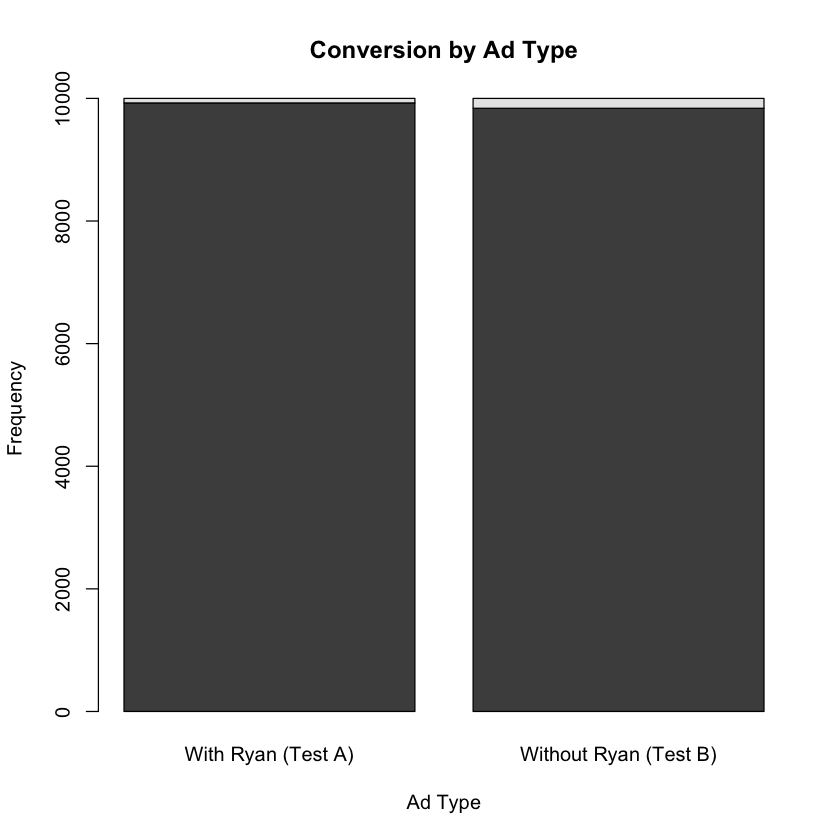

In [3]:
tab = table(c(yA,yB), c(rep("A", nA), rep("B", nB)))
barplot(tab, xlab = "Ad Type", ylab = "Frequency", xaxt = "n", main = "Conversion by Ad Type",
        args.legend = c("bottom", bty = "n"))
axis(side = 1, at = c(0.7, 1.9),
     labels = c("With Ryan (Test A)", "Without Ryan (Test B)"), tick = FALSE)

As is visualized above, and as was apparent by the observed conversion rates, the likelihood that someone converts is not the same for each ad. Indeed $\hat\theta_A-\hat\theta_B = -0.0087$. 

#### Frequentist Analysis

Clearly this value is different from zero, but what we'd like to decide is whether it's so far from 0 that we should believe $\theta_A-\theta_B\neq0$. The frequentist investigates questions of this nature using hypothesis tests and confidence intervals. In this setting, interest lies in testing $$H_0: \theta_A=\theta_B \text{ vs. H_A: }\theta_A \neq\theta_B$$ and calculating confidence intervals for $\theta_A-\theta_B$. Given the type of data we're dealing with, this is done in the context of the a $\chi^2$-test (or, equivalently, the two-sample $Z$-test for proportions).

In [4]:
prop.test(x = c(sum(yA), sum(yB)), n = c(nA, nB), 
          alternative = "two.sided", correct = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  c(sum(yA), sum(yB)) out of c(nA, nB)
X-squared = 32.591, df = 1, p-value = 1.137e-08
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.011684429 -0.005715571
sample estimates:
prop 1 prop 2 
0.0074 0.0161 


As we see from the output above, the p-value associated with this test is $1.137\times10^{-8}$. Such a small p-value indicates strong evidence against $H_0$. Likewise, we see that the 95\% confidence interval for $\theta_A-\theta_B$ is $(-0.011684429, -0.005715571)$ which is entirely negative, again suggesting that the conversion rates are indeed different.

#### Bayesian Analysis

Next, let's reconsider the Ryan Reynolds example through the lens of Bayesian inference. In particular, we will combine prior information with observed data to draw conclusions about $\theta_A-\theta_B$. As we have seen, this will be done through the *posterior* distribution. But first, we need *prior* distributions which reflect our understanding of $\theta_A$ and $\theta_B$ prior to collecting any data. 

To begin, we will pretend like we have *no* prior information. We *do* know that $\theta_A,\theta_B\in[0,1]$ but we'll pretend like all values in $[0,1]$ are equally plausible. Such an assumption gives rise to an *uninformative* prior.

Previously we saw that the $\text{BETA}(\alpha,\beta)$ distribution is a reasonable model for probabilities. We will use this distribution taking $\alpha=1$ and $\beta=1$ as our priors. Specifically, we will assume $\theta_A\sim \text{BETA}(1,1)$ and $\theta_B\sim \text{BETA}(1,1)$. Let's visualize this distribution (for these and other values of $\alpha$ and $\beta$) to understand the assumptions we're imposing. Click the image below.

[![Beta_Visualizer](beta_viz.png)](https://nathaniel-t-stevens.shinyapps.io/Beta_Distribution_Visualizer/ "Beta Visualizer")

As was proved above, if $$\theta\sim\text{BETA}(\alpha, \beta)$$ and $$Y|\theta\sim\text{BIN}(1,\theta),$$ then $$\theta|Y\sim\text{BETA}\left(\alpha + \sum_{i=1}^n y_i ~ , ~ \beta + n - \sum_{i=1}^ny_i\right).$$ 

Given the data, and the assumptions we've made, the posterior distribution for $\theta_A$ in the "with Ryan" ad is $$\text{BETA}(1+74, 1+10000-74) = \text{BETA(75, 9927)}.$$ Similarly, the posterior for $\theta_B$ in the "without Ryan" ad is $$\text{BETA}(1+161, 1+10000-161) = \text{BETA}(162, 9840).$$ These posteriors are visualized and summarized below.

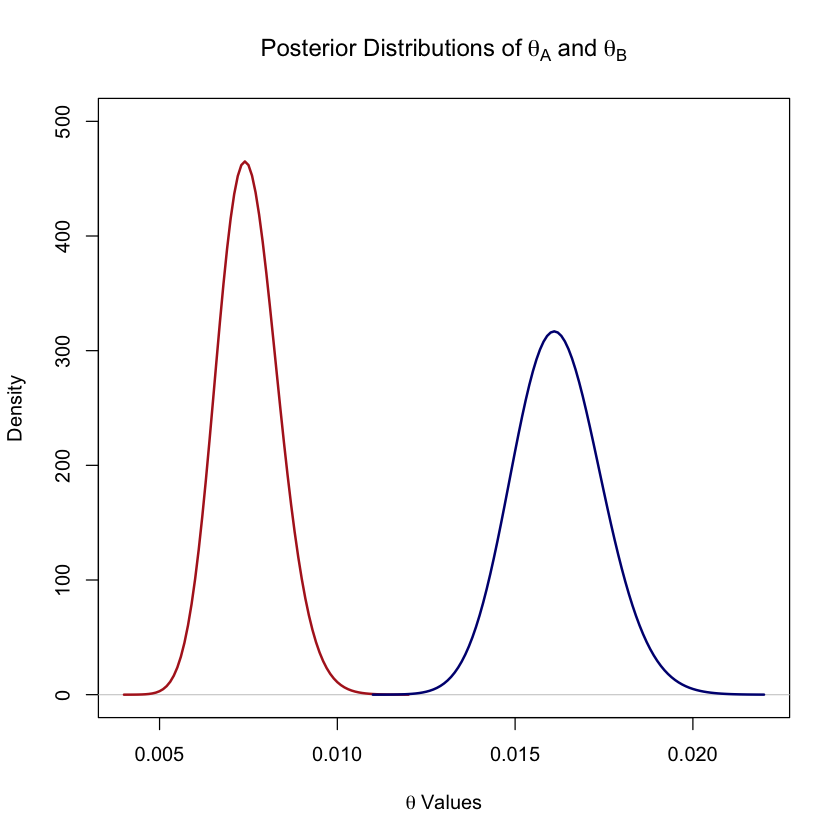

In [6]:
plot(x = 0, y = 0, 
     main = expression("Posterior Distributions of"~theta[A]~"and"~theta[B]),
     ylab = "Density", ylim = c(0,500),
     xlab = expression(theta~"Values"), xlim = c(0.004, 0.022))
abline(h=0, col = "lightgrey")
lines(x = seq(0.004, 0.012, 0.0001),
      y = dbeta(x = seq(0.004, 0.012, 0.0001), shape1 = 75, shape2 = 9927),
      lwd = 2, col = "firebrick")
lines(x = seq(0.011, 0.022, 0.0001),
      y = dbeta(x = seq(0.011, 0.022, 0.0001), shape1 = 162, shape2 = 9840),
      lwd = 2, col = "navyblue")

The mean, median, and more of a $\text{BETA}(\alpha,\beta)$ distribution are $$\frac{\alpha}{\alpha+\beta}$$ $\;$ $$F_{(\alpha,\beta)}^{-1}(0.5)$$ $\;$ $$\frac{\alpha-1}{\alpha+\beta-2}.$$ These values for each of the posteriors are shown below. Unsurprisingly they are all very close to the observed conversion rates $\hat\theta_A=0.0074$ and $\hat\theta_B=0.0161$.

|                          |       Mean|        Median|       Mode|
|:-------------------------|----------:|-------------:|----------:|
|With Ryan (Test A)        |  0.0074985|   0.007465698|     0.0074|
|Without Ryan (Test B)     | 0.01609839|    0.01606614|  0.0160016|

We could also summarize these posteriors more thoroughly with HDIs, posterior proabilities, and even Bayes factors, but recall that our interest is in $\theta_A-\theta_B$, not $\theta_A$ and $\theta_B$ individually. So let's determine the posterior for $\theta_A-\theta_B$ and then study it more thoroughly.

Unfortunately, there isn't a convenient closed-form expression for the distribution of the difference of two $\text{BETA}$ distributions. Actually, there *is* a closed form expression, but it's really gross. You can read about it in [this paper](https://www.tandfonline.com/doi/abs/10.1080/03610929308831114). So instead, we're going to simulate this distribution.

We know that $\theta_A|Y \sim \text{BETA}(\alpha_A, \beta_A)$ and $\theta_B|Y \sim \text{BETA}(\alpha_B, \beta_B)$. If we take many random draws from these distributions and then take their pairwise differences, the result will approximate the distribution of $\theta_A-\theta_B|Y$. Let's try it below.

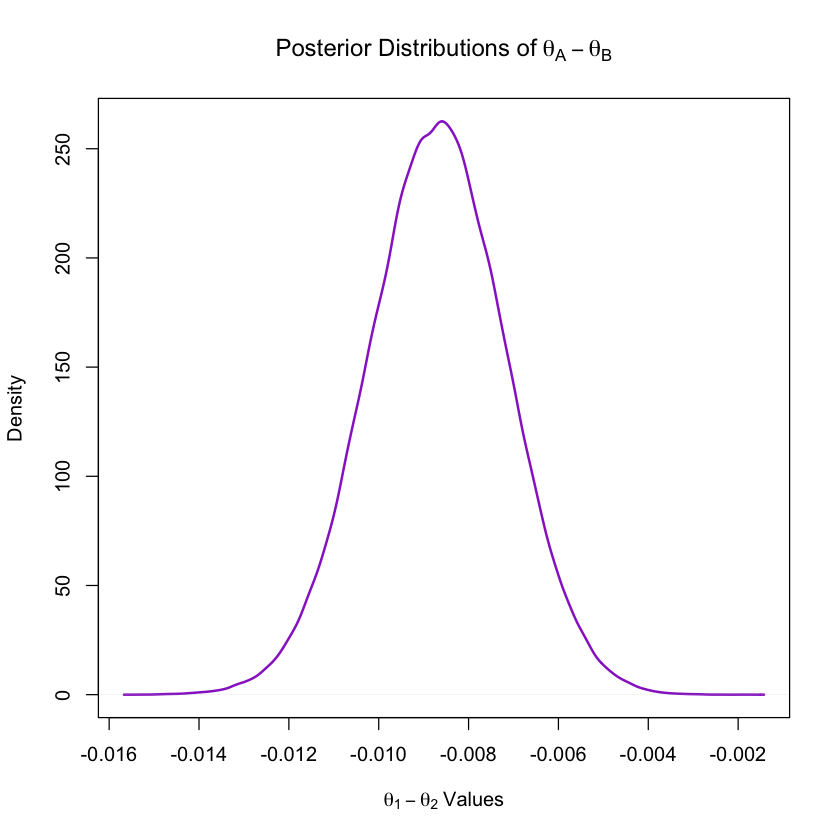

In [15]:
thetaA = rbeta(n = 100000, shape1 = 75, shape2 = 9927)  
thetaB = rbeta(n = 100000, shape1 = 162, shape2 = 9840)  
plot(density(thetaA - thetaB), main = expression("Posterior Distributions of"~theta[A]-theta[B]),
     ylab = "Density", xlab = expression(theta[A]-theta[B]~"Values"), lwd = 2, col = "darkorchid")

The following function provides many useful summaries of this posterior. Note one of those summaries is the HDI, which is why we first load in the `HDInterval` package.

In [134]:
install.packages("HDInterval", repos='http://cran.us.r-project.org')
library(HDInterval)

summarize_posterior = function(x, delta = NULL, cl = 0.9, 
                               main = "", xlab = "", ylab = "Density",
                               xlim = NULL, ylim = NULL, col = "firebrick",
                               loc1 = "topleft", loc2 = "topright"){
  den = density(x)
  plot(den, lwd = 2, col = col, main = main, xlab = xlab, ylab = ylab, xlim = xlim, ylim = ylim)
  polygon(den, col = adjustcolor(col, 0.25))
  if(!is.null(delta)){
    delta1 = delta[1]
    delta2 = delta[2]
    if(delta1 == -Inf){
      delta1x = which.min(den$x)
    }else{
      delta1x = which.min(abs(delta1 - den$x))
    }
    if(delta2 == Inf){
      delta2x = which.max(den$x)
    }else{
      delta2x = which.min(abs(delta2 - den$x))
    }
    segments(x0 = delta1, y0 = 0, x1 = delta1, y1 = den$y[delta1x], col = col, lwd = 2)
    segments(x0 = delta2, y0 = 0, x1 = delta2, y1 = den$y[delta2x], col = col, lwd = 2)
    polygon(x = c(delta1, den$x[delta1x:delta2x], delta2), y = c(0,den$y[delta1x:delta2x], 0), 
            col = adjustcolor(col, 0.5))
    cpm = mean(x >= delta1 & x <= delta2)
    post_odds = cpm/(1-cpm)
  }
  HDI = as.numeric(hdi(x, cl)[1:2])
  segments(x0 = HDI[1], y0 = max(den$y)*0.05, x1 = HDI[2], y1 =  max(den$y)*0.05, lwd = 3)
  text(x = mean(HDI), y = max(den$y)*0.05, pos=3,
       labels = paste0(100*cl,"% HDI: (", round(HDI[1],4), ", ", round(HDI[2],4), ")"))
  legend(loc1, bty = "n", legend=c(paste0("Posterior Mean = ", round(mean(x),4)),
                                        paste0("Posterior Mode = ", round(den$x[which.max(den$y)],4)),
                                        paste0("Posterior Median = ", round(median(x),4))))
  if(!is.null(delta)){
      if(delta1 == -Inf & delta2 != Inf){
          legend(loc2, legend = bquote("Pr("*-infinity~"<"~theta[A]-theta[B]~"<"~.(delta2)*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }else if(delta1 != -Inf & delta2 == Inf){
          legend(loc2, legend = bquote("Pr("*.(delta1)~"<"~theta[A]-theta[B]~"<"~infinity*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }else if(delta1 == -Inf & delta2 == Inf){
          legend(loc2, legend = bquote("Pr("*-infinity~"<"~theta[A]-theta[B]~"<"~infinity*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }else{
          legend(loc2, legend = bquote("Pr("*.(delta1)~"<"~theta[A]-theta[B]~"<"~.(delta2)*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }
  }
}


The downloaded binary packages are in
	/var/folders/_h/37g2vs3d3r9b9v8q_bwr7z3c0000gn/T//Rtmp4V3uz7/downloaded_packages


Let's now tinker with this function to see what kind of information it gives us.

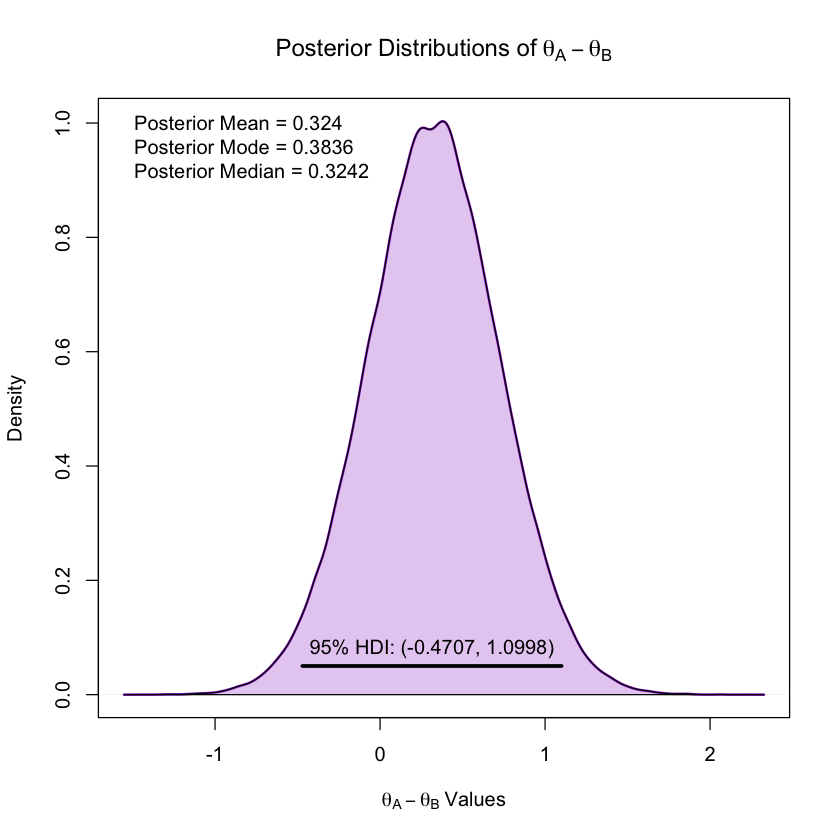

In [135]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"))

What have we learned?

* The posterior is concentrated around $-0.0087$, as all measures of center are near this value. This suggests, in some sense, that the most tyical value of $\theta_A-\theta_B$ is -0.0087.
* The 95\% HDI is $(-0.0117, -0.0057)$. So although we can't say exactly what $\theta_A-\theta_B$ is, we are 95\% sure that it lies between $-0.0117$ and $-0.0057$.

Let's next calculate some posterior probabilities that may be of interest. First, let's calculate the probability that the "Without Ryan" ad (Test B) is strictly *better* than the "With Ryan" ad (Test A). This corresponds to the probability $$\mathbb{P}(\theta_A < \theta_B|Y).$$

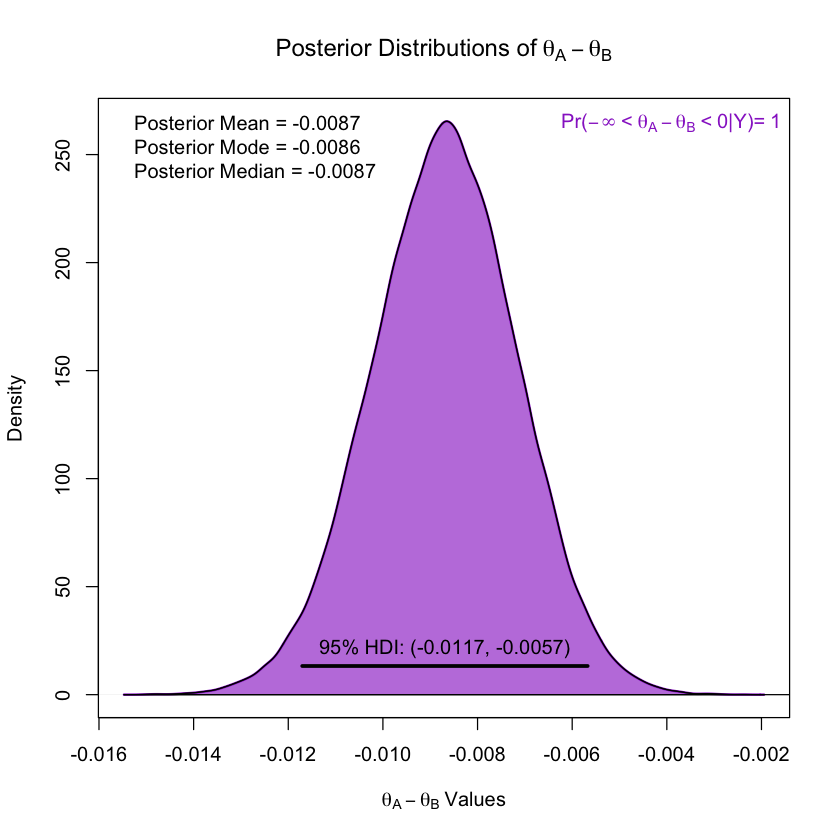

In [61]:
summarize_posterior(x = thetaA-thetaB, delta = c(-Inf, 0), cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"))

As we can see, that $\mathbb{P}(\theta_A < \theta_B|Y)$ is estimated to be 1, indicating that we are *certain* that the "Without Ryan" ad (Test B) is better than the "With Ryan" ad (Test A).

As an unrealistic hypothetical, let's suppose that the "Without Ryan" ad (Test B) is more expensive to make and operate than the the "With Ryan" ad (Test A). Further, let's assume that to make the change from the A ad to the B ad worthwhile, we require $\theta_B-\theta_A\geq0.01$. Using carefully specified posterior probabilities, we can easily calculate the likelihood that $\theta_B-\theta_A\geq0.01$ or, equivalently, that $\theta_A-\theta_B\leq-0.01$. This corresponds to the probability $$\mathbb{P}(\theta_A - \theta_B\leq-0.01|Y).$$

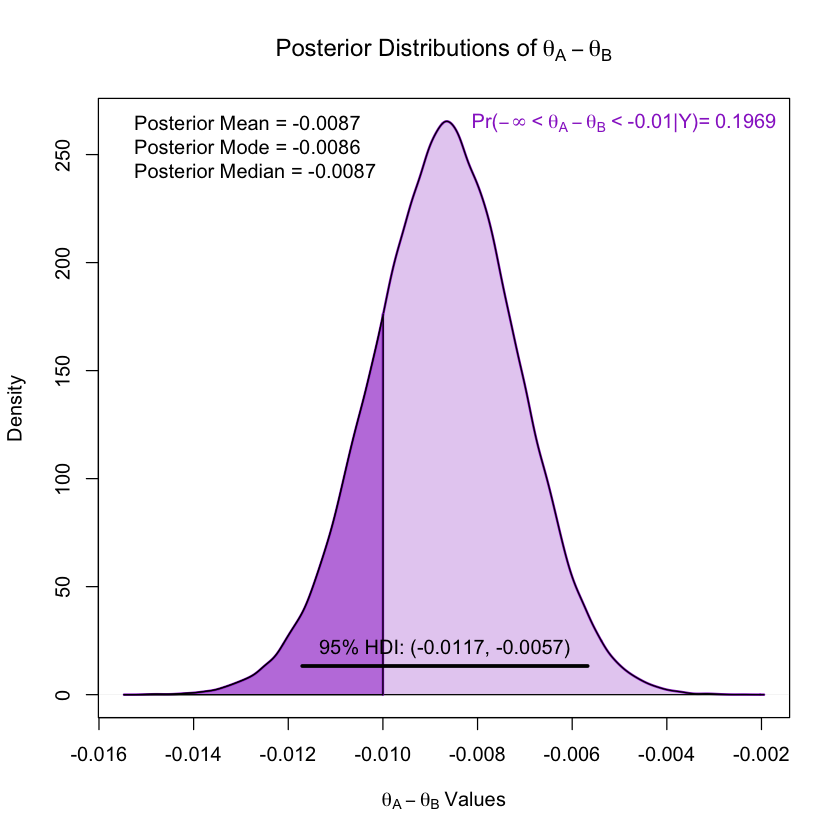

In [60]:
summarize_posterior(x = thetaA-thetaB, delta = c(-Inf, -0.01), cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"))

As we can see, that $\mathbb{P}(\theta_A - \theta_B\leq-0.01|Y)$ is estimated to be 0.1965. So if this was our circumstance, we would not be very confident that the "Without Ryan" ad (Test B) is *sufficiently* better than the "With Ryan" ad (Test A). We may then choose to retain the "With Ryan" ad.

These analyses assumed that $\theta_A-\theta_B$ was the quantity of interest. This implicitly assumes that differences on the additive scale are of relevance. However, especially when comparing probabilities, interest may lie in relative (or percent) differences in which case $\theta_A/\theta_B$ may be the quantity of interest. It turns out that this simulation method makes it trivial to study the posterior distribition of $$\frac{\theta_A}{\theta_B} \big| Y$$ or even $$\frac{\theta_B}{\theta_A}\big|Y.$$ We simply take ratios of the draws from $\theta_A|Y$ and $\theta_B|Y$ instead of pairwise differences. Below we visualize the distribution of $\frac{\theta_A}{\theta_B}\big|Y$

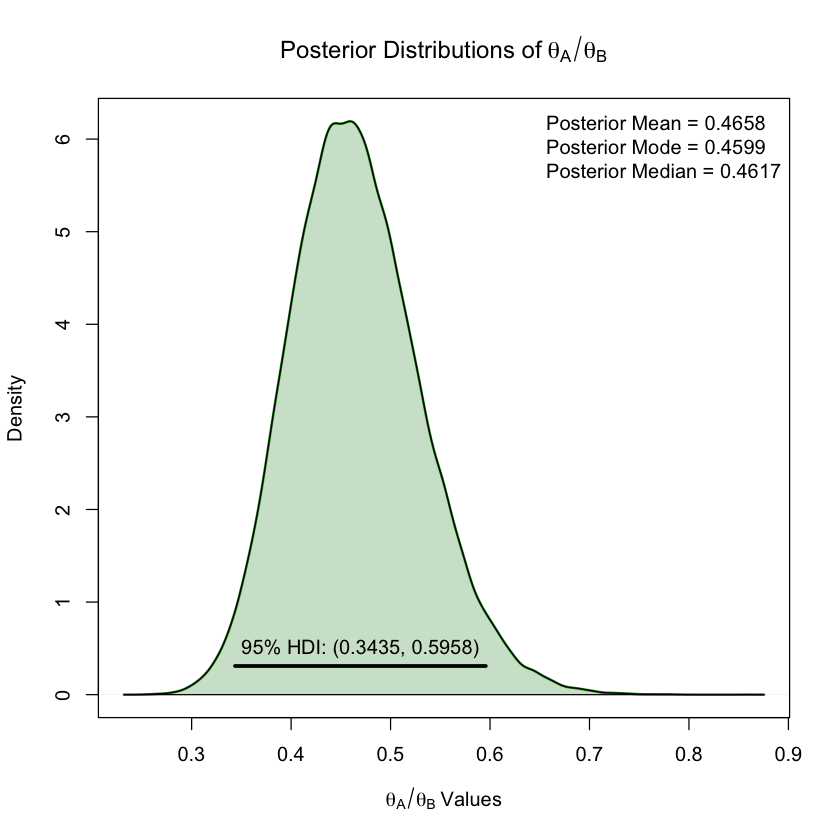

In [51]:
summarize_posterior(x = thetaA/thetaB, delta = NULL, cl = 0.95, col = "forestgreen", 
                    main = expression("Posterior Distributions of"~theta[A]/theta[B]), 
                    xlab = expression(theta[A]/theta[B]~"Values"), loc1 = "topright")

And here we visualize the distribution of $\frac{\theta_B}{\theta_A}|Y$

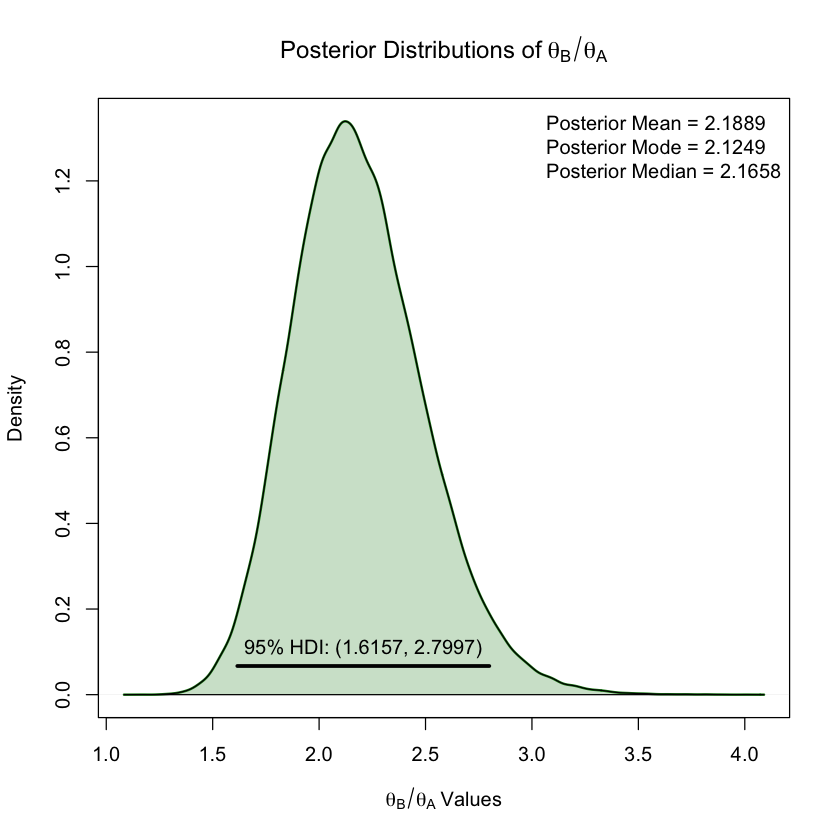

In [52]:
summarize_posterior(x = thetaB/thetaA, delta = NULL, cl = 0.95, col = "forestgreen", 
                    main = expression("Posterior Distributions of"~theta[B]/theta[A]), 
                    xlab = expression(theta[B]/theta[A]~"Values"), loc1 = "topright")

The posteriors above may be used to more thoroughly study how simular or different $\theta_A$ and $\theta_B$ are in the percent scale. Likewise, posterior distributions for odds ratios or other functions of $\theta_A$ and $\theta_B$ are easily determined.

### MCMC Simulation

In [54]:
install.packages('bayesAB', repos='http://cran.us.r-project.org')
library(bayesAB)


The downloaded binary packages are in
	/var/folders/_h/37g2vs3d3r9b9v8q_bwr7z3c0000gn/T//Rtmp4V3uz7/downloaded_packages


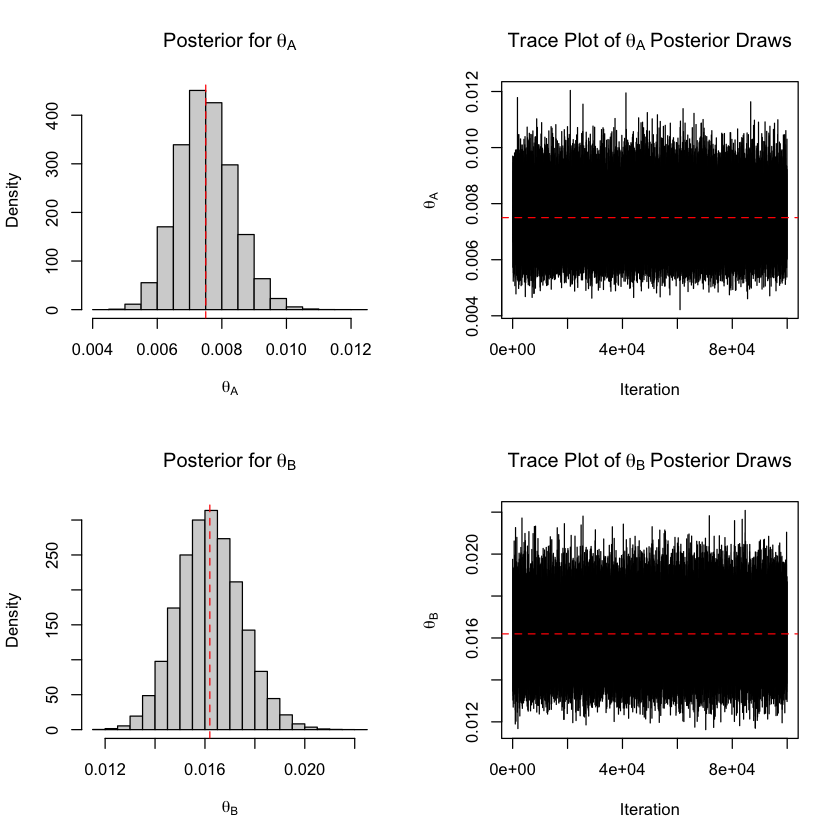

In [55]:
res = bayesTest(yA, yB, distribution = 'bernoulli',
                 priors = c('alpha' = 1, 'beta' = 1))
thetaA = res$posteriors$Probability$A
thetaB = res$posteriors$Probability$B

par(mfrow=c(2,2))
hist(thetaA, main = expression("Posterior for"~theta[A]), probability = TRUE, xlab = expression(theta[A]))
abline(v = mean(thetaA), lty = 2, col = "red")
ts.plot(thetaA, main = expression("Trace Plot of"~theta[A]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[A]))
abline(h = mean(thetaA), lty = 2, col = "red")
hist(thetaB, main = expression("Posterior for"~theta[B]), probability = TRUE, 
     xlab = expression(theta[B]))
abline(v = mean(thetaB), lty = 2, col = "red")
ts.plot(thetaB, main = expression("Trace Plot of"~theta[B]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[B]))
abline(h = mean(thetaB), lty = 2, col = "red")

Let's calculate next use our `summarize_posterior` function to explore the posteriors for $\theta_A$, $\theta_B$, and $\theta_A-\theta_B$. These *should* look like the ones we've previously dealt with that were based on analytical forms.

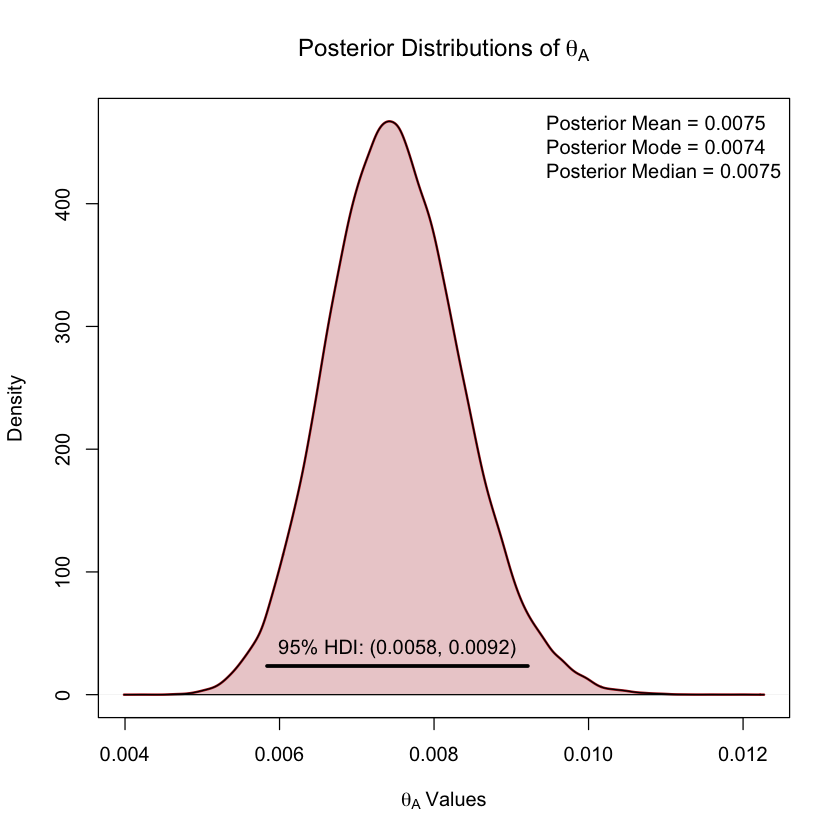

In [64]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

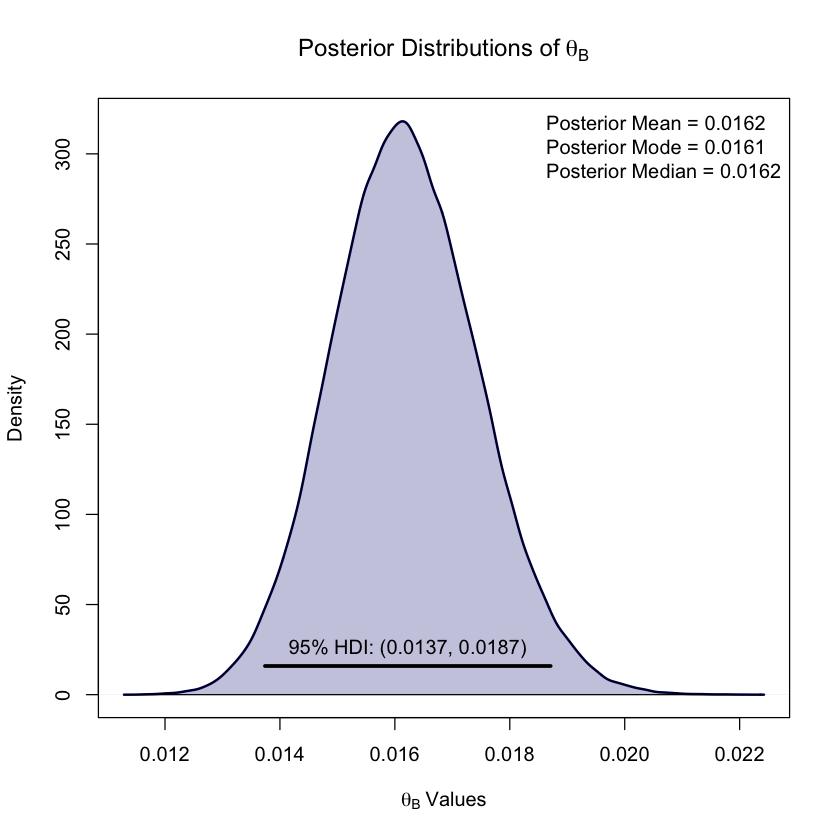

In [57]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

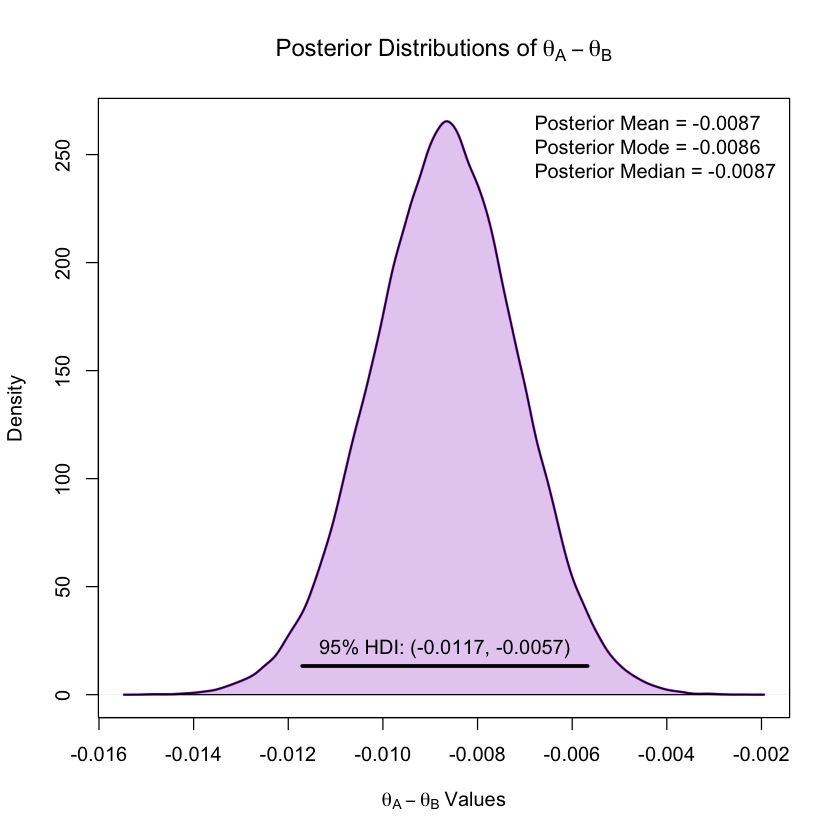

In [65]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

### Informative Priors

Until now we have assumed uninformative $\text{BETA}(1,1)$ priors for $\theta_A$ and $\theta_B$. Let's select new $\alpha$ and $\beta$ values to incorporate some historical knowledge into our prior specifications. 

Suppose we're pretty sure, from past experience, that the conversion rates are most likely to be in the neighbourhood of 1\%-5\%. What values of $\alpha$ and $\beta$ should we choose that would be consistent with this prior information? Let's again use the [Beta Distribution Visualizer](https://nathaniel-t-stevens.shinyapps.io/Beta_Distribution_Visualizer/) to aid in this decision.

Let's take $\alpha = 1.2$ and $\beta = 10$. This gives rise to the following prior distribution for $\theta_A$ and $\theta_B$.

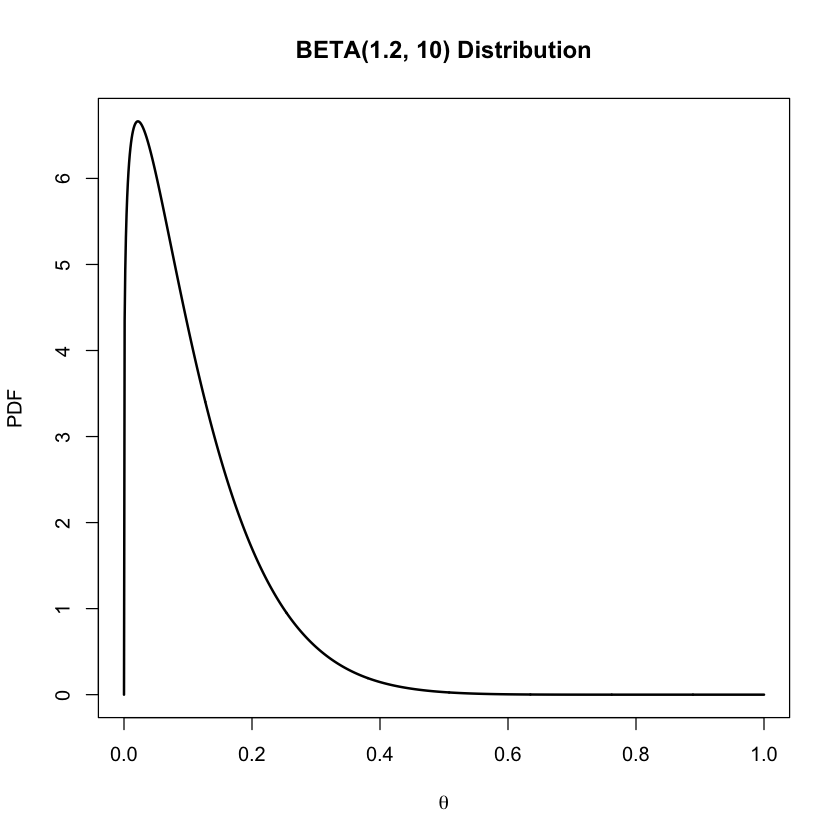

In [69]:
plot(x = seq(0, 1, 0.001), y = dbeta(x = seq(0, 1, 0.001), shape1 = 1.2, shape2 = 10), type = "l", lwd = 2,
    main = "BETA(1.2, 10) Distribution", ylab = "PDF", xlab = expression(theta))

With our new friend `bayesTest` we can easily determine (via MCMC simulation) the posteriors for $\theta_A$,  $\theta_B$, and hence $\theta_A-\theta)B$ for different values specifications of the priors.

In [70]:
res = bayesTest(yA, yB, distribution = 'bernoulli',
                 priors = c('alpha' = 1.2, 'beta' = 10))
thetaA = res$posteriors$Probability$A
thetaB = res$posteriors$Probability$B

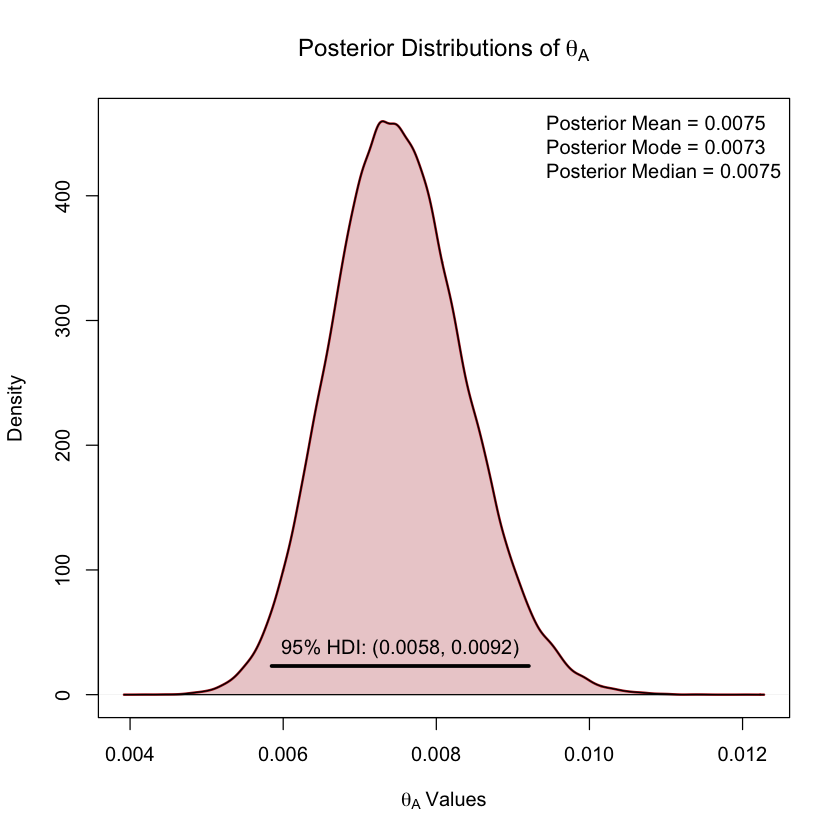

In [71]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

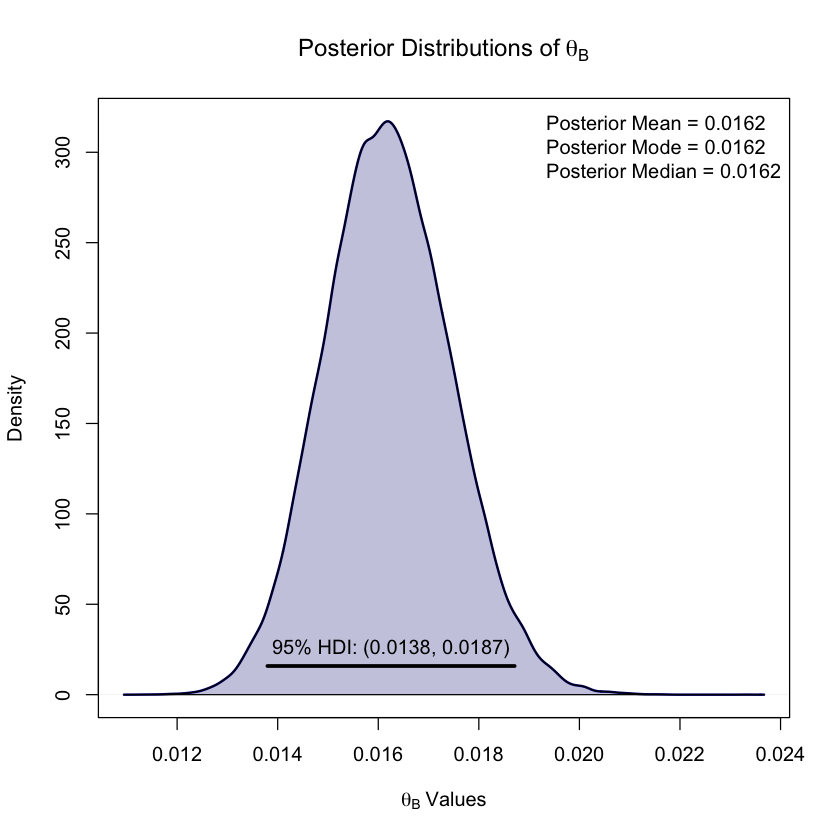

In [72]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

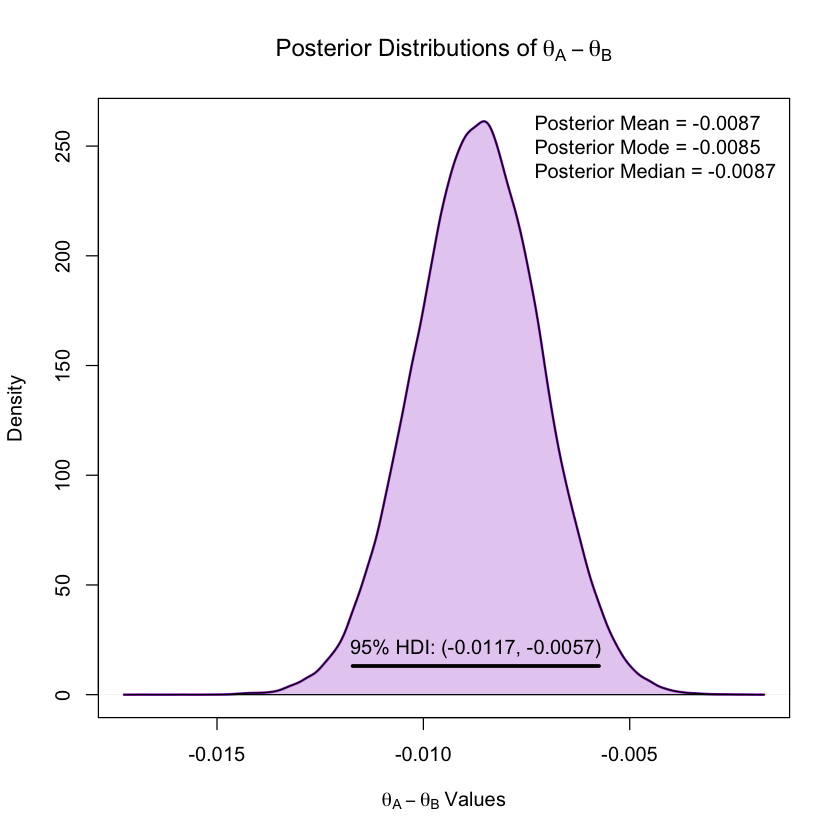

In [73]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

These posterior distributions look remarkably similar to those corresponding to the uninformative $\text{BETA}(1,1)$ priors. This suggests that our conclusions are robust to different prior specifications. But don't be fooled, this won't *always* be true! In fact, it's the exception to the rule. Why might this happening here? 

$\;$

### EXERCISE: Optimizely Homepage Redesign
During a website redesign, Optimizely was interested in how new versions of certain pages influenced
things like conversion and engagement relative to the old version. One outcome they were interested in was whether or not the redesigned homepage lead to a significant increase in the number of new accounts created ([you can read about it in this book](https://www.wiley.com/en-us/A+B+Testing%3A+The+Most+Powerful+Way+to+Turn+Clicks+Into+Customers-p-9781118659205)). In this experiment they developed two versions of the homepage:

* A: Original Homepage
* B: Redesigned Homepage

![optimizely_AB_test](optimizely.png)

The metric they were interested in was conversion rate (i.e., the probability $\theta=$ that a visitor would sign up). During the experiment, $n_A=8872$ visitors were shown the original homepage and $n_B=8642$ visitors were shown the redesigned homepage. In *original* version $280$ visitors signed up while in the *redesigned* version $399$ visitors signed up. This corresponds to observed conversion rates of $\hat{\theta}_A = 0.0316$ and $\hat{\theta}_B = 0.0462$.

Analyze the data from this experiment with both frequentist and Bayesian methods. What do you conclude?

## What About Non-Binary Data?

### Comparing Means of Continuous Distributions

What if our data was continuous instead of binary, and we wanted to compare means rather than probabilities? This is the kind of thing that a frequentist might do with a two-sample $t$-test. 

How would a Bayesian approach this problem? Just like the case of binary data! We need only specify the data distribution, the prior distributions, and use MCMC to simulate draws from the relevant posterior distribution.

Below we will consider a hypothetical example with normal data. Using now familiar notation, the data distribution will follow $Y|\theta, \sigma^2 \sim \mathcal{N}(\theta, \sigma^2)$. In this case, the conjugate prior for $(\theta,\sigma^2)$ is the [normal-inverse-gamma distribution](https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution) with parameters $\mu$, $\lambda$, $\alpha$, and $\beta$.

Suppose an online retailer is experimenting with two version of their checkout experience:

* A: current version
* B: new version

and interest lies in comparing average revenue per user. We generate some random data below and construct visualizations. The histograms depict the observed revenue distributions in each variant. The red curves overlayed are maximum likelihood-fitted normal density curves. Their agreement with the histograms indicate that the normal distribution well-characterizes this data. 

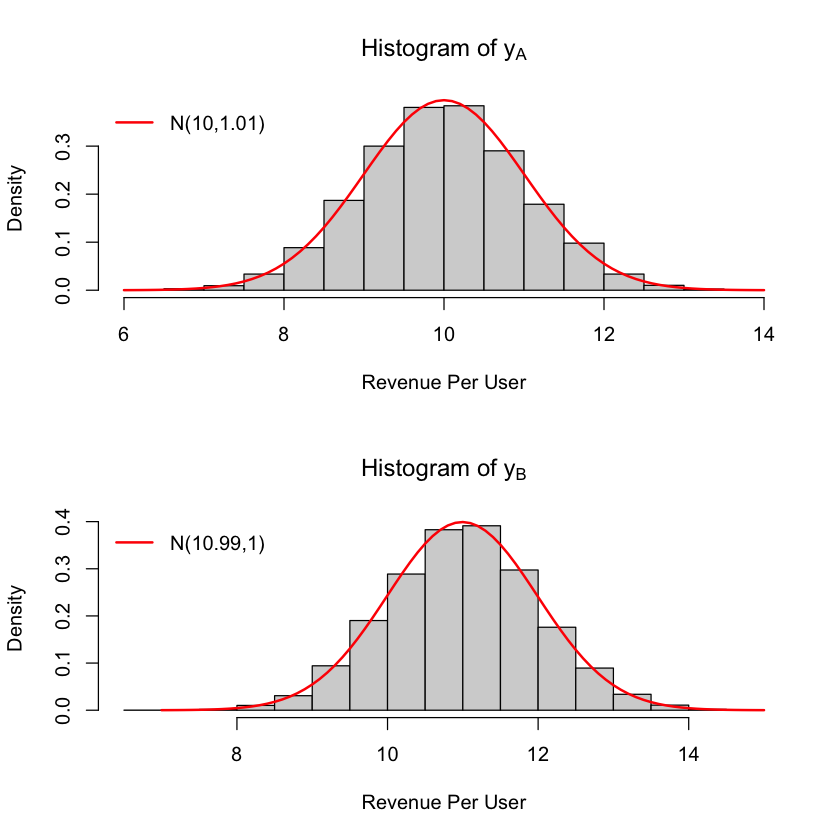

In [145]:
set.seed(3122023)
yA = rnorm(n = 10000, mean = 10, sd = 1)
yB = rnorm(n = 10000, mean = 11, sd = 1)
par(mfrow = c(2,1))
hist(yA, probability = TRUE, xlab = "Revenue Per User", 
     main = expression("Histogram of y"[A]), breaks = 20)
lines(x = seq(6, 14, 0.1), y = dnorm(x = seq(6, 14, 0.1), mean = mean(yA), sd = sd(yA)),
      col = "red", lwd = 2)
legend("topleft", lwd = 2, col = "red", bty = "n",
        legend = paste0("N(",round(mean(yA),2),",",round(sd(yA),2),")"))
hist(yB, probability = TRUE, xlab = "Revenue Per User", 
     main = expression("Histogram of y"[B]), breaks = 20)
lines(x = seq(7, 15, 0.1), y = dnorm(x = seq(7, 15, 0.1), mean = mean(yB), sd = sd(yB)),
      col = "red", lwd = 2)
legend("topleft", lwd = 2, col = "red", bty = "n",
        legend = paste0("N(",round(mean(yB),2),",",round(sd(yB),2),")"))

As we did in the last example, we're going to use MCMC simulation to approximate the relevant posterior distributions. Of interest to us here are $\theta_A$ and $\theta_B$, the expected revenue per user in each variant, and their difference $\theta_A-\theta_B$. We shall again use `bayesTest` to generate posterior draws from $(\theta_A,\sigma_A^2)|Y$ and $(\theta_B,\sigma_B^2)|Y$. Histograms and trace plots for these posteriors are shown below.

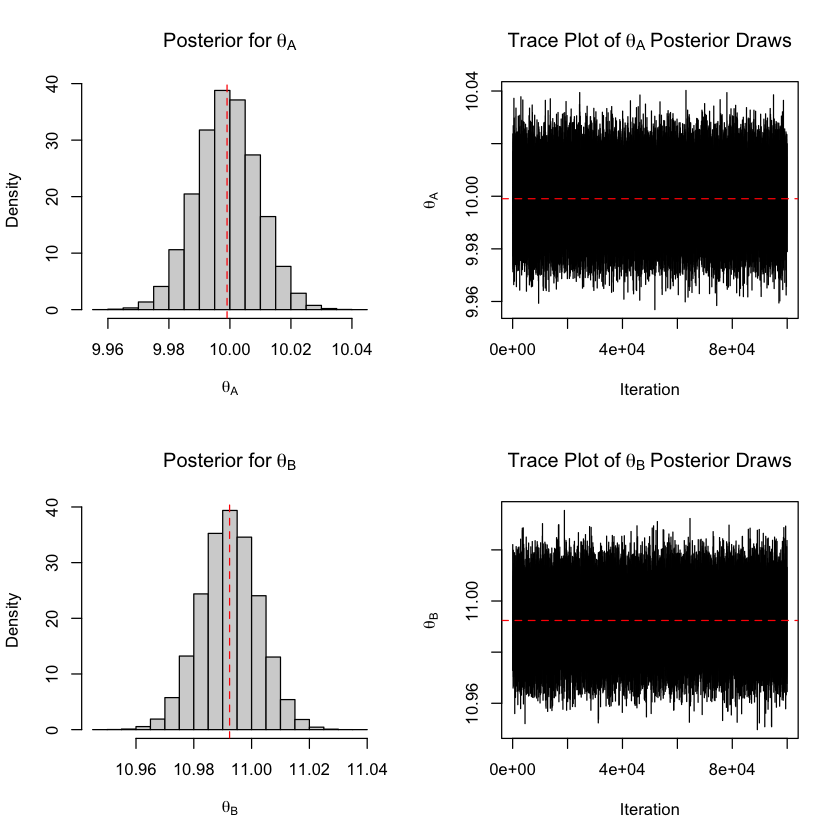

In [146]:
res = bayesTest(yA, yB, distribution = 'normal',
                priors = c('mu' = 5, 'lambda' = 1, 'alpha' = 3, 'beta' = 1))
thetaA = res$posteriors$Mu$A
thetaB = res$posteriors$Mu$B

par(mfrow=c(2,2))
hist(thetaA, main = expression("Posterior for"~theta[A]), probability = TRUE, xlab = expression(theta[A]))
abline(v = mean(thetaA), lty = 2, col = "red")
ts.plot(thetaA, main = expression("Trace Plot of"~theta[A]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[A]))
abline(h = mean(thetaA), lty = 2, col = "red")
hist(thetaB, main = expression("Posterior for"~theta[B]), probability = TRUE, 
     xlab = expression(theta[B]))
abline(v = mean(thetaB), lty = 2, col = "red")
ts.plot(thetaB, main = expression("Trace Plot of"~theta[B]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[B]))
abline(h = mean(thetaB), lty = 2, col = "red")

We've used `summarize_posterior` enough time times, and looked at enough posteriors now that below we include visual summaries of the relevant posteriors in this setting without commenting further. 

**Exercise:** Examine the plots below and think about what they tell you. What conclusions do you draw? Does they agree with a frequentist analysis? Do these summaries offer additional insight that a frequentist analysis does not?

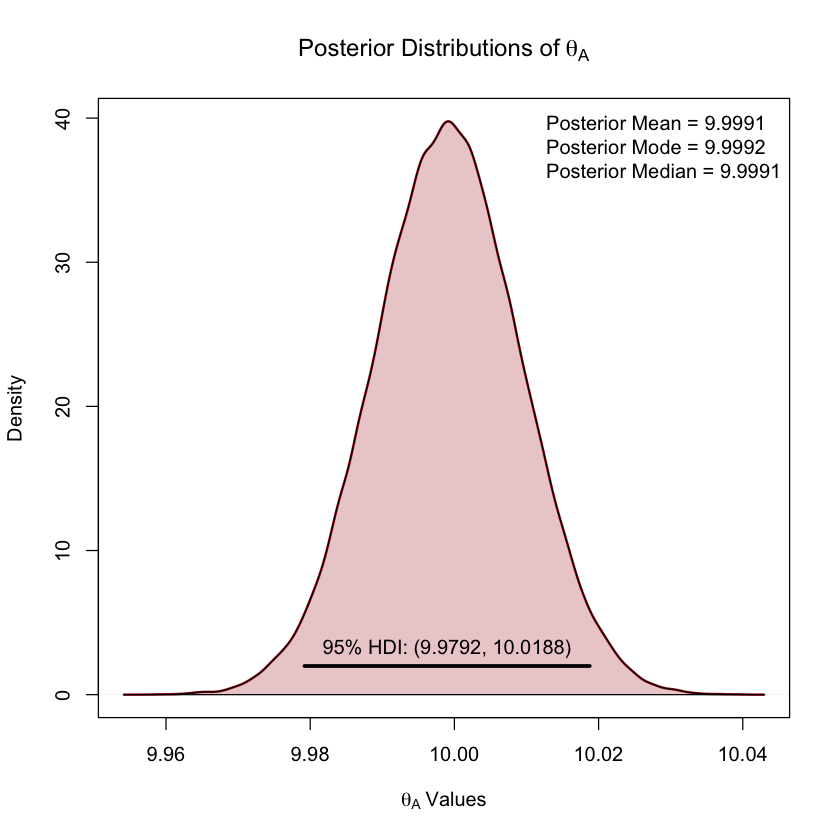

In [150]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

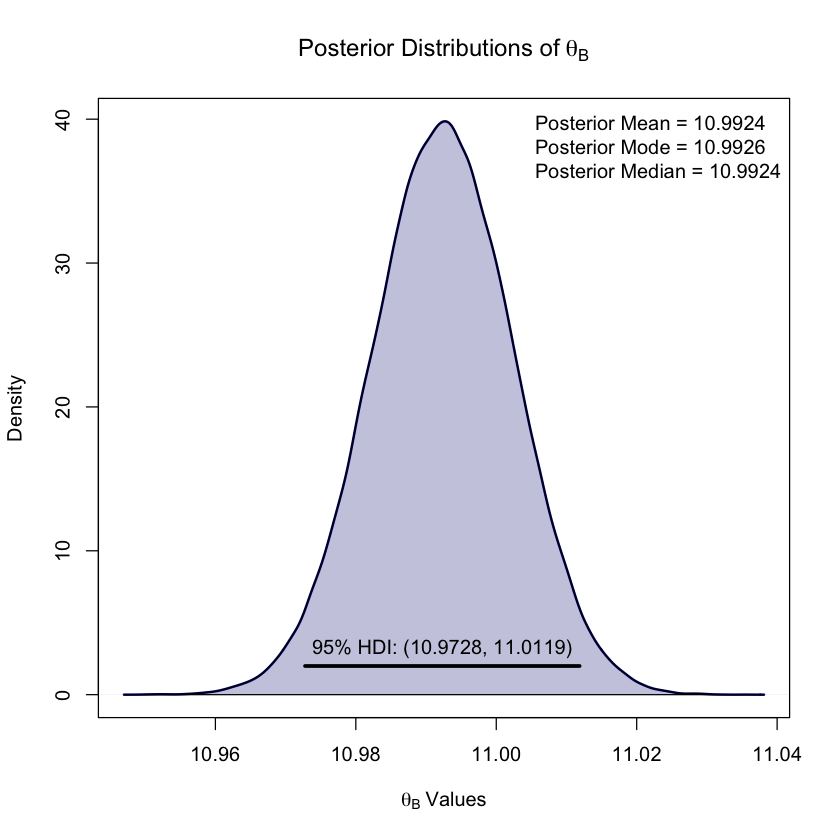

In [148]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

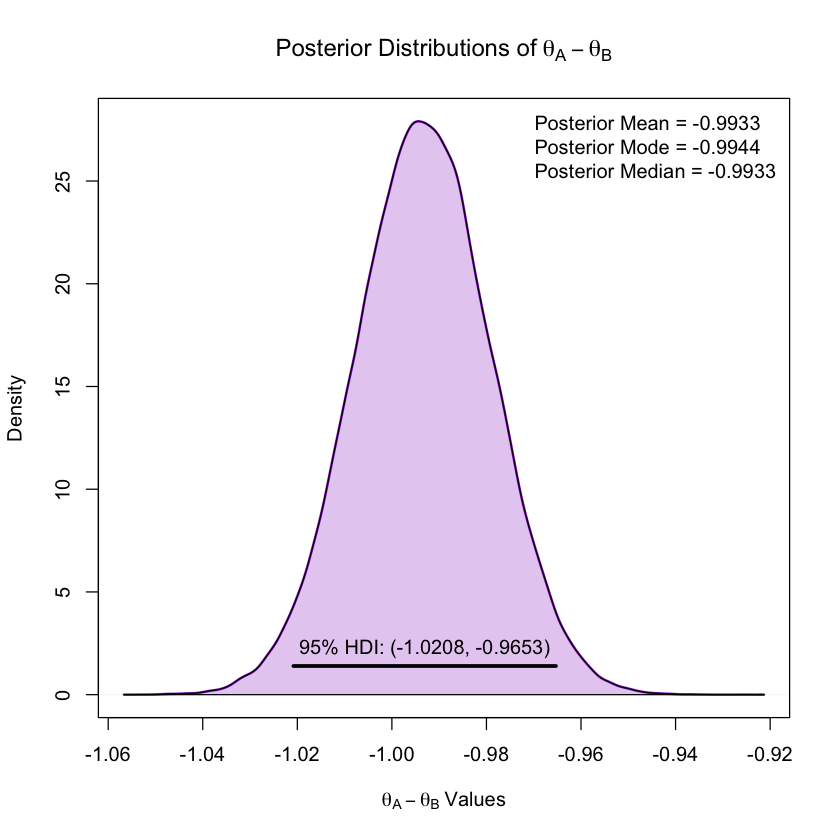

In [149]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

### Comparing Quantiles of Continuous Distributions

We'll again consider a scenario in which interest lies in a continuous response variable. But unlike in the previous section, let's assume that the data is skewed, in which case the normality assumption and any analyses that rely on it are invalid. As is often the case with skewed data, we will focus our attention on quantiles as measures of location.

To motivate such a scenario, we consider comparing page load times. [Researchers at LinkedIn](https://arxiv.org/pdf/1903.08762.pdf) described running online experiments where, among other things, interest lies in optimizing key performance indicators related to site speed and service latency, such as page load time. Page load time distributions tend to be right skewed and optimizing for average page load time is not as useful as optimizing tail performance; since the user experience associated with high page load times is negative, it is better to minimize worst case scenarios; minimizing typical page load times is not sufficient. As such, it is the industry standard to summarize and optimize page load time distributions with respect to their $90^\text{th}$ percentile. 

Here we consider a hypothetical experiment whose goal is to develop a new version of your webpage (B) that loads more quickly than the current version (A). The metric of interest here will be $\theta_A$ and $\theta_B$, the $90^\text{th}$ percentiles of the page load time distributions in each variant. We use the simulated data from the same example in [this paper](https://www.tandfonline.com/doi/full/10.1080/00031305.2021.2000495) and perform a Bayesian analysis. Although the context is rather different from the previous ones we've encountered, we'll find that the Bayesian analysis feels quite familiar.

We begin by visualizing the observed data.

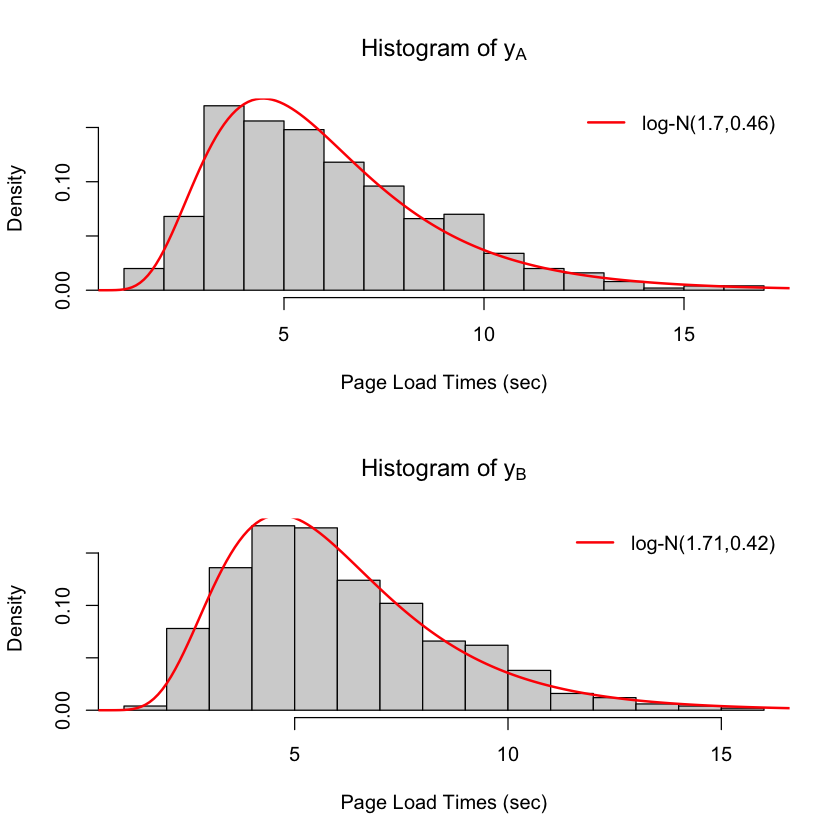

In [151]:
plt = read.csv(file = "pageloadtime.csv", header = TRUE)
yA = plt$Response[plt$Group == 1]
yB = plt$Response[plt$Group == 2]
par(mfrow = c(2,1))
hist(yA, probability = TRUE, xlab = "Page Load Times (sec)", 
     main = expression("Histogram of y"[A]), breaks = 20)
lines(x = seq(0, 20, 0.1), y = dlnorm(x = seq(0, 20, 0.1), meanlog = mean(log(yA)), sdlog = sd(log(yA))),
      col = "red", lwd = 2)
legend("topright", lwd = 2, col = "red", bty = "n",
        legend = paste0("log-N(",round(mean(log(yA)),2),",",round(sd(log(yA)),2),")"))
hist(yB, probability = TRUE, xlab = "Page Load Times (sec)", 
     main = expression("Histogram of y"[B]), breaks = 20)
lines(x = seq(0, 20, 0.1), y = dlnorm(x = seq(0, 20, 0.1), meanlog = mean(log(yB)), sd = sd(log(yB))),
      col = "red", lwd = 2)
legend("topright", lwd = 2, col = "red", bty = "n",
        legend = paste0("log-N(",round(mean(log(yB)),2),",",round(sd(log(yB)),2),")"))

As we see above, the page load time distributions are right-skewed and decidedly non-normal. One good model for right-skewed data is the [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). The red curves overlayed on the histogram are maximum likelihood-fitted log-normal density curves. Their agreement with the histograms indicate that the log-normal distribution well-characterizes this data. Thus, we carry on assuming $Y|(\mu,\sigma^2)\sim \log\mathcal{N}(\mu,\sigma^2)$.

Next we'll use MCMC simulation to approximate the relevant posterior distributions. Of interest to us here are $\theta_A$ and $\theta_B$, the $90^\text{th}$ percentile of the PLT distribution in each variant, as well as their difference $\theta_A-\theta_B$. We shall again use `bayesTest` to generate posterior draws. But unlike before, these draws come from posteriors we aren't directly interested in. In particular, they come from $(\mu, \sigma^2)|Y$. However, the $100p^\text{th}$ percentile of a log-normal distribution parameteried by $\mu$ and $\sigma^2$ is given by $$\text{exp}\left(\mu+\sigma\Phi^{-1}(p)\right)$$ where $\Phi(\cdot)$ is the standard normal CDF. We can exploit this relationship to obtain posterior draws for $\theta$ *from* the posterior draws of $(\mu, \sigma^2)$. We do this below. As usual, histograms and trace plots for the posteriors are included for diagnostic purposes.

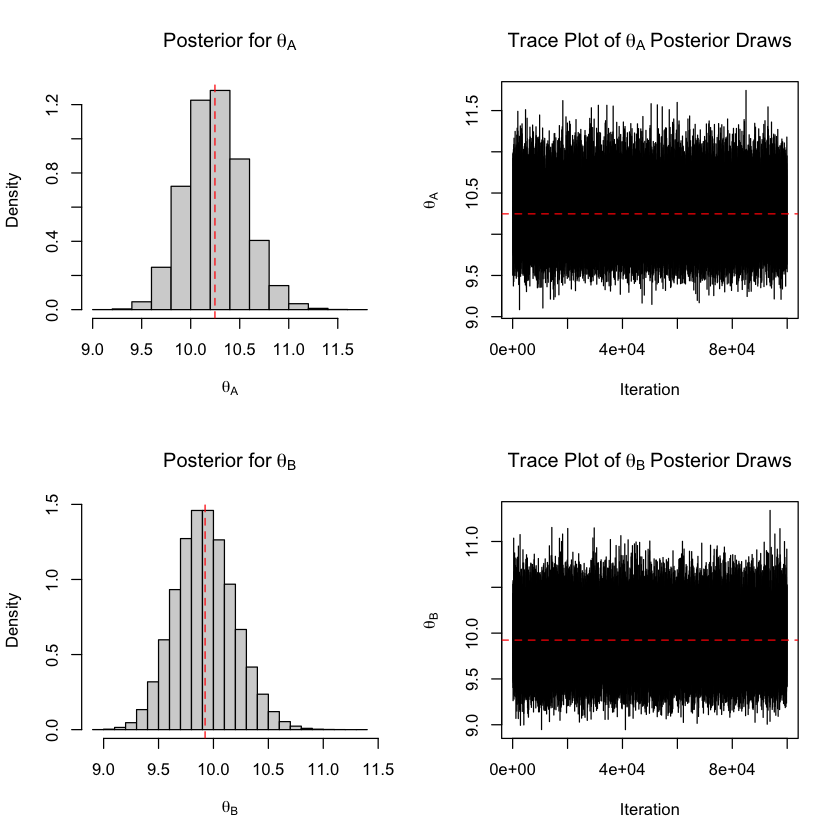

In [154]:
res = bayesTest(yA, yB, distribution = 'lognormal',
                priors = c('mu' = 5, 'lambda' = 1, 'alpha' = 3, 'beta' = 1))

muA = res$posteriors$Mu$A
sigA = sqrt(res$posteriors$Sig_Sq$A)
thetaA = exp(muA + sigA*qnorm(0.90))
muB = res$posteriors$Mu$B
sigB = sqrt(res$posteriors$Sig_Sq$B)
thetaB = exp(muB + sigB*qnorm(0.90))

par(mfrow=c(2,2))
hist(thetaA, main = expression("Posterior for"~theta[A]), probability = TRUE, xlab = expression(theta[A]))
abline(v = mean(thetaA), lty = 2, col = "red")
ts.plot(thetaA, main = expression("Trace Plot of"~theta[A]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[A]))
abline(h = mean(thetaA), lty = 2, col = "red")
hist(thetaB, main = expression("Posterior for"~theta[B]), probability = TRUE, 
     xlab = expression(theta[B]))
abline(v = mean(thetaB), lty = 2, col = "red")
ts.plot(thetaB, main = expression("Trace Plot of"~theta[B]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[B]))
abline(h = mean(thetaB), lty = 2, col = "red")

As with the last example, we use `summarize_posterior` to construct several useful posterior visualizations and leave the interpretation as an exercise.

**Exercise:** Examine the plots below and think about what they tell you. What conclusions do you draw? Do some research and try to find a hypothesis test for comparing percentiles and perform it, comparing your findings to your previous conclusions. Does they agree? Do these Bayesian summaries offer additional insight that the frequentist analysis does not?

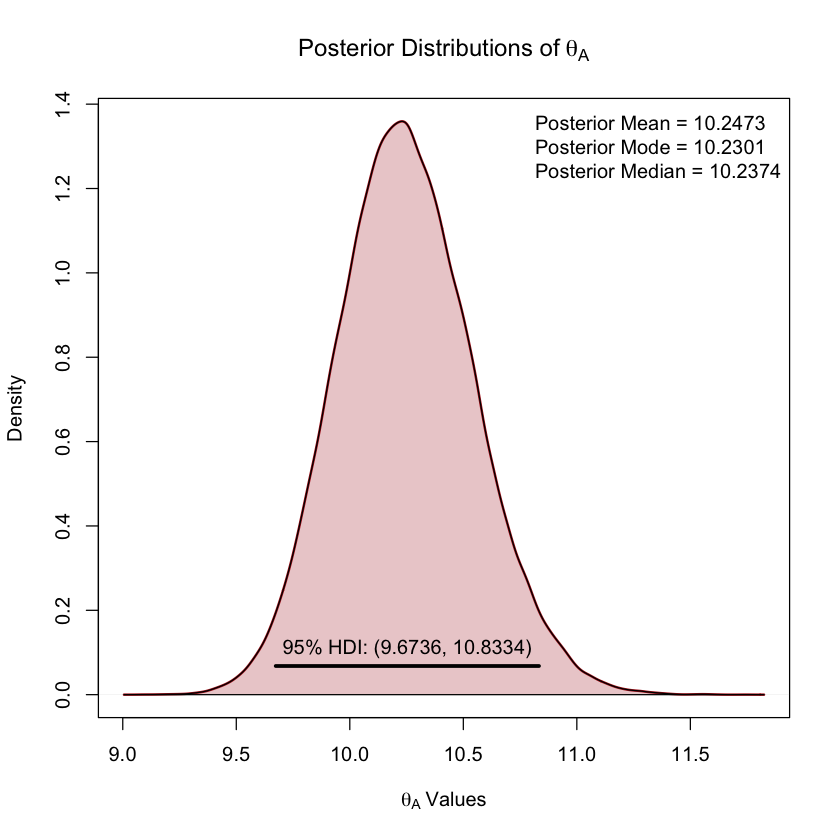

In [155]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

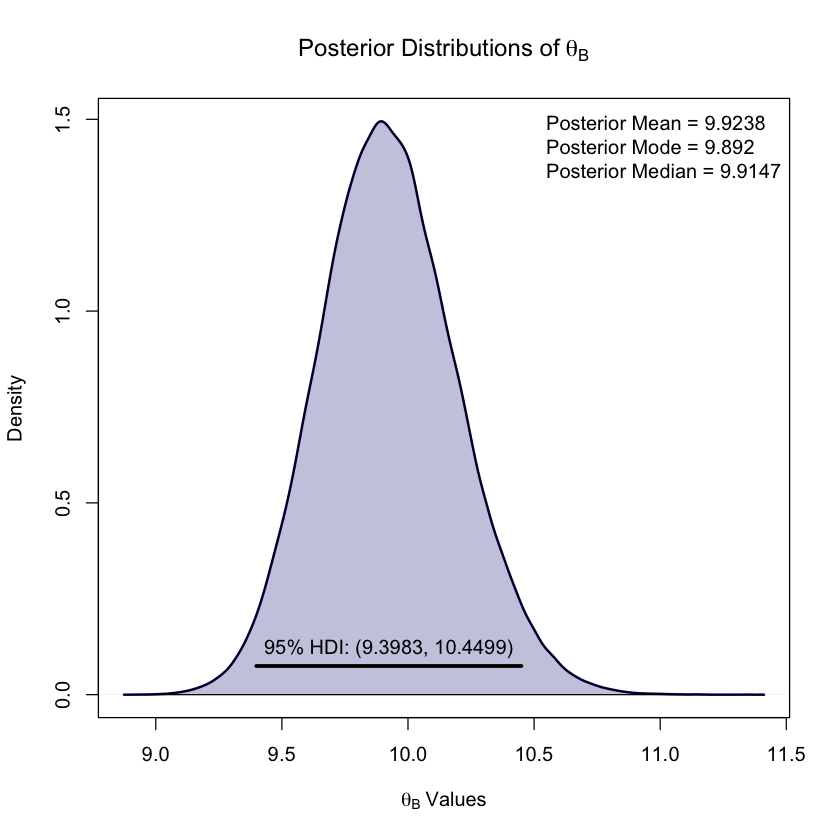

In [156]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

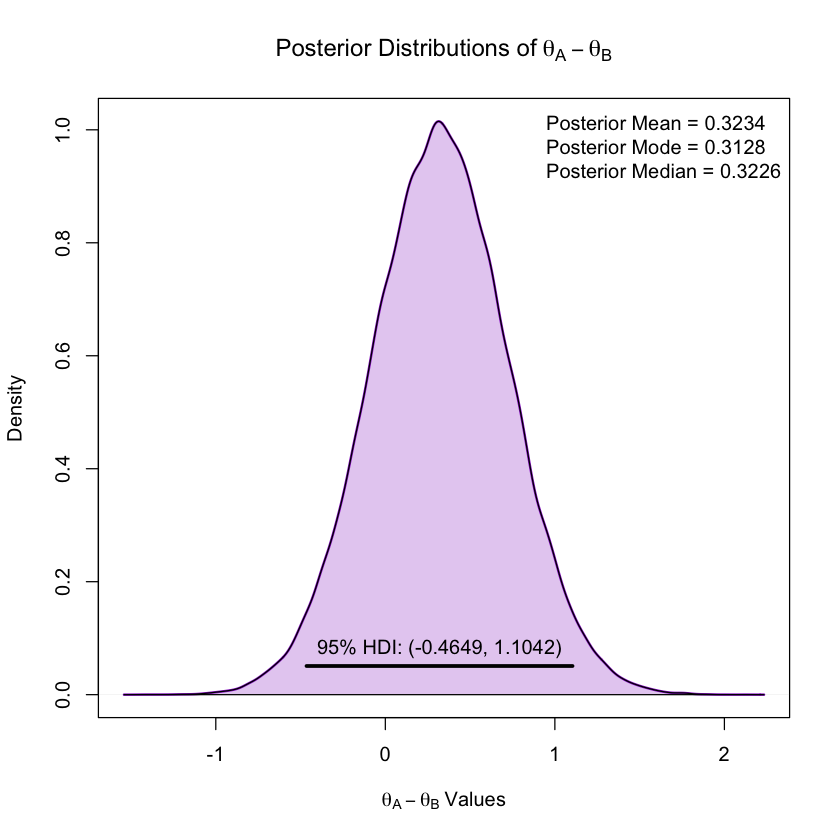

In [157]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")